<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [40]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [42]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

Ответ: Похоже на равномерное распределение на отрезке

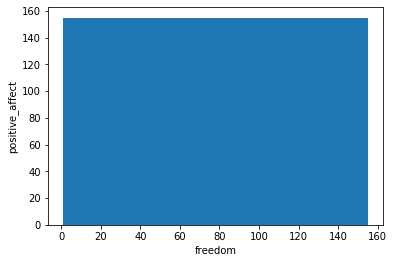

In [74]:
#частотный график
plt.hist(df['Freedom'],1)

freedom = df['Freedom']
positive_affect = df['Positive affect']

plt.xlabel('freedom')
plt.ylabel('positive_affect')
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [46]:
#Медиана
statistics.median(freedom)

71.0

In [47]:
#Мода
statistics.mode(freedom)

StatisticsError: no unique mode; found 156 equally common values

In [48]:
#Среднее
statistics.mean(freedom)

nan

In [49]:
#Проверка нулевых значений
df[df['Freedom'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [50]:
#Исключение из данных строки с нулевыми значениями
df = df.loc[df['Country (region)']!='Qatar',:]
freedom = df['Freedom']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           155 non-null object
Ladder                     155 non-null int64
SD of Ladder               155 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      151 non-null float64
Healthy life
expectancy    149 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.5+ KB


In [51]:
#Среднее
statistics.mean(freedom)

78.0

In [52]:
#стандартное отклонение
statistics.pstdev(freedom)

44.74371464239419

In [53]:
#дисперсия
statistics.pvariance(freedom)

2002.0

In [55]:
#минимум
min(freedom)

1.0

In [56]:
#максимум
max(freedom)

155.0

In [75]:
# размах
max(freedom) - min(freedom)

154.0

Почему нельзя найти моду?

Ответ: Моду найти нельзя, так как нет повторяющихся значений.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Text(0, 0.5, 'positive_affect')

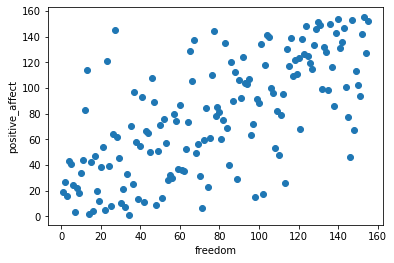

In [62]:
freedom = df['Freedom']
positive_affect = df['Positive affect']
plt.scatter(freedom, positive_affect)
plt.xlabel('freedom')
plt.ylabel('positive_affect')

Судя по графику, корреляция между Freedom и Positive affect есть и она положительная.

In [78]:
from scipy.stats import pearsonr

In [82]:
corr, p_value = pearsonr(freedom,positive_affect)
print(corr)

0.6817698430601657


Ответ: Знак коэффициента пожительный. Это говорит о том, что корреляция прямая.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [85]:
#Централизация
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [86]:
min(freedom_1)

-77.0

In [87]:
max(freedom_1)

77.0

In [90]:
#Масштабирование
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

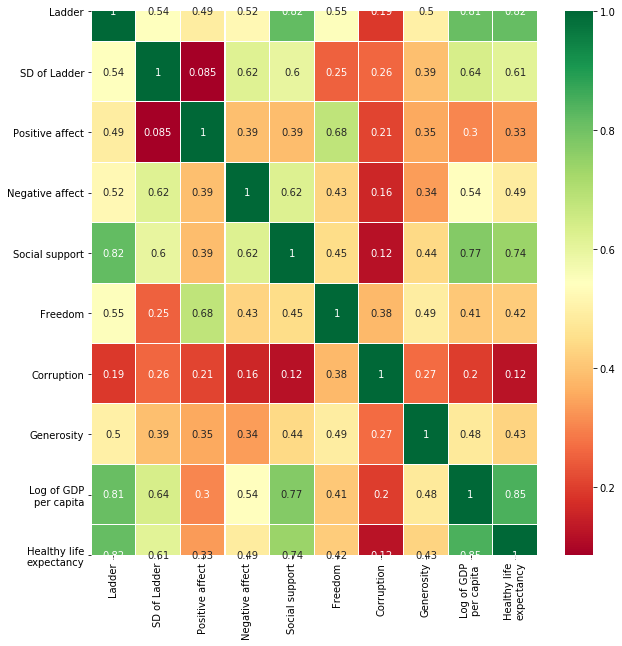

In [107]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.1)
#data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(10,10)
plt.show()

Загрузить таблицу цен на авокадо: 

In [108]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

Ответ:График похож на нормальное распределение со смещением среднего значения влево

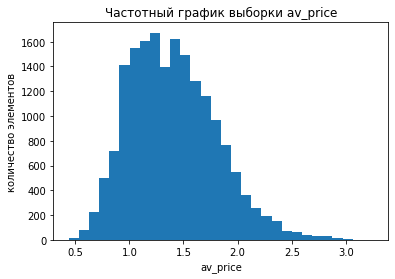

In [117]:

av_price = df['AveragePrice']
plt.hist(av_price,30)
plt.xlabel('av_price')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки av_price')

plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

Вывод: есть слабая обратная корреляция между колонками.Т.е.есть небольшая зависимость (~ в 20% случаев), когда рост цены на авокадо приводит к падению продаж.

In [119]:
corr, p_value = pearsonr(df['4046'],av_price)
print(corr)

-0.2083170484878848


In [120]:
corr, p_value = pearsonr(df['4225'],av_price)
print(corr)

-0.17292777250933541


In [121]:
corr, p_value = pearsonr(df['4770'],av_price)
print(corr)

-0.1794459839797562
